In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('covid_toy.csv')
df 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [3]:
df.sample(10)

,age,gender,fever,cough,city,has_covid
10,75,Female,NaN,Mild,Delhi,No
37,55,Male,100.0,Mild,Kolkata,No
71,75,Female,104.0,Strong,Delhi,No
59,6,Female,104.0,Mild,Kolkata,Yes
61,81,Female,98.0,Strong,Mumbai,No
99,10,Female,98.0,Strong,Kolkata,Yes
31,83,Male,103.0,Mild,Kolkata,No
2,42,Male,101.0,Mild,Delhi,No
17,40,Female,98.0,Strong,Delhi,No
73,34,Male,98.0,Strong,Kolkata,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
df.isna().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [6]:
df.isna().any()

age          False
gender       False
fever         True
cough        False
city         False
has_covid    False
dtype: bool

# For HAndling Missing VAlues import Imputer 

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
si=SimpleImputer()

In [9]:

df['age'].unique()


array([60, 27, 42, 31, 65, 84, 14, 20, 19, 64, 75, 25, 51, 70, 69, 40, 12,
       73, 71, 80, 13, 23, 33, 16, 34, 15, 83, 26, 74, 82, 38, 55, 49, 50,
       22, 72, 18, 66, 44, 11, 47, 81,  6, 24, 56, 10, 54, 68,  5,  8, 48,
       17, 46, 59, 79], dtype=int64)

In [10]:
import seaborn as sns 


C:\Users\hp\AppData\Local\Temp\ipykernel_2044\1207035257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


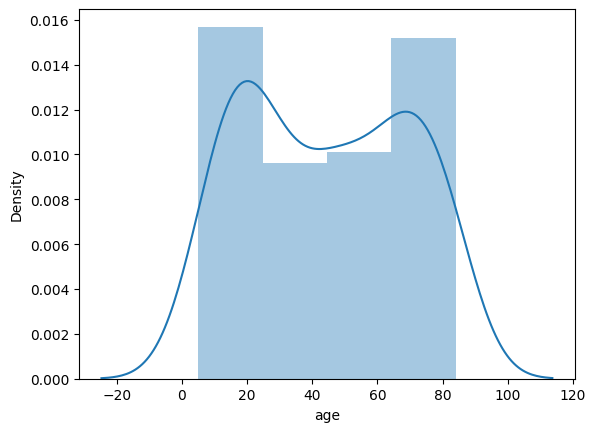

In [69]:
sns.distplot(df['age'])
plt.savefig('age_distplot.png')


In [12]:
df['age'].value_counts().sort_values(ascending=False)

age
65    4
19    4
34    4
64    3
82    3
51    3
83    3
27    3
20    3
49    3
42    3
69    3
5     3
47    2
14    2
25    2
11    2
12    2
73    2
71    2
75    2
80    2
81    2
24    2
23    2
38    2
60    2
16    2
10    2
33    1
50    1
55    1
74    1
15    1
70    1
13    1
40    1
72    1
84    1
31    1
22    1
26    1
18    1
66    1
44    1
17    1
68    1
48    1
54    1
8     1
46    1
6     1
59    1
56    1
79    1
Name: count, dtype: int64

<Axes: ylabel='age'>

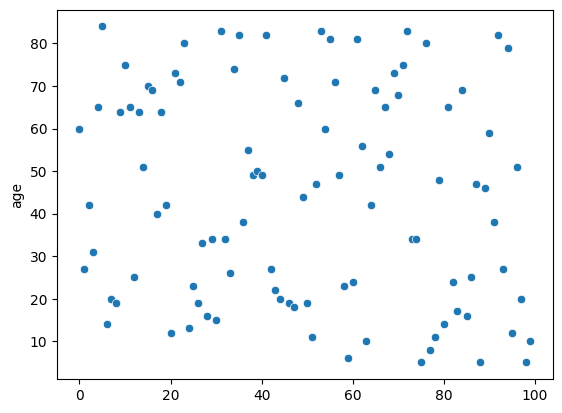

In [13]:
sns.scatterplot(df['age'])

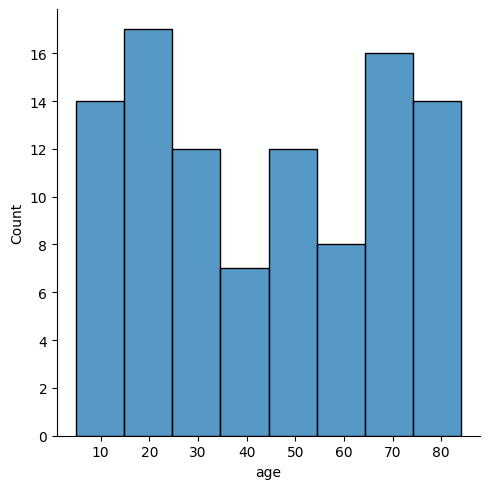

In [70]:
sns.displot(df['age'])
plt.savefig('age_displot.png')

In [15]:
df['city'].unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)

In [16]:
df['cough'].unique()

array(['Mild', 'Strong'], dtype=object)

In [17]:
df['fever'].unique()

array([103., 100., 101.,  98.,  nan,  99., 102., 104.])

In [18]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['has_covid'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [21]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [22]:
df['fever'].value_counts()

fever
101.0    17
98.0     17
104.0    14
100.0    13
99.0     10
102.0    10
103.0     9
Name: count, dtype: int64

In [23]:
df['gender'].value_counts()

gender
Female    59
Male      41
Name: count, dtype: int64

In [24]:
df['has_covid'].value_counts()

has_covid
No     55
Yes    45
Name: count, dtype: int64

In [25]:
df 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [26]:
from sklearn.model_selection import train_test_split

In [27]:

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='has_covid'),df['has_covid'],train_size=0.8,random_state=42)

In [28]:
x_train

,age,gender,fever,cough,city
55,81,Female,101.0,Mild,Mumbai
88,5,Female,100.0,Mild,Kolkata
26,19,Female,100.0,Mild,Kolkata
42,27,Male,100.0,Mild,Delhi
69,73,Female,103.0,Mild,Delhi
...,...,...,...,...,...
60,24,Female,102.0,Strong,Bangalore
71,75,Female,104.0,Strong,Delhi
14,51,Male,104.0,Mild,Bangalore
92,82,Female,102.0,Strong,Kolkata


In [29]:
x_test

,age,gender,fever,cough,city
83,17,Female,104.0,Mild,Kolkata
53,83,Male,98.0,Mild,Delhi
70,68,Female,101.0,Strong,Delhi
45,72,Male,99.0,Mild,Bangalore
44,20,Male,102.0,Strong,Delhi
39,50,Female,103.0,Mild,Kolkata
22,71,Female,98.0,Strong,Kolkata
80,14,Female,99.0,Mild,Mumbai
10,75,Female,NaN,Mild,Delhi
0,60,Male,103.0,Mild,Kolkata


In [30]:
y_train

55    Yes
88     No
26    Yes
42    Yes
69     No
     ... 
60    Yes
71     No
14     No
92     No
51    Yes
Name: has_covid, Length: 80, dtype: object

In [31]:
y_test

83     No
53    Yes
70     No
45     No
44     No
39     No
22    Yes
80    Yes
10     No
0      No
18    Yes
30    Yes
73    Yes
33     No
90     No
4      No
76    Yes
77     No
12     No
31     No
Name: has_covid, dtype: object

# Simple Way

# fever

# Handling Missing Values

In [36]:
x_trained_fever=si.fit_transform(x_train[['fever']])
x_test_fever=si.fit_transform(x_test[['fever']])
x_trained_fever

array([[101.],
       [100.],
       [100.],
       [100.],
       [103.],
       [103.],
       [102.],
       [101.],
       [101.],
       [101.],
       [ 98.],
       [104.],
       [103.],
       [104.],
       [100.],
       [101.],
       [104.],
       [102.],
       [102.],
       [103.],
       [104.],
       [102.],
       [101.],
       [104.],
       [102.],
       [101.],
       [ 99.],
       [101.],
       [104.],
       [102.],
       [100.],
       [ 98.],
       [ 98.],
       [101.],
       [100.],
       [100.],
       [101.],
       [104.],
       [101.],
       [103.],
       [101.],
       [ 98.],
       [ 99.],
       [ 99.],
       [101.],
       [ 99.],
       [101.],
       [104.],
       [ 98.],
       [101.],
       [103.],
       [101.],
       [ 98.],
       [ 99.],
       [ 98.],
       [ 99.],
       [102.],
       [101.],
       [101.],
       [104.],
       [100.],
       [ 98.],
       [100.],
       [101.],
       [100.],
       [100.],
       [ 9

In [37]:
x_trained_fever.shape

(80, 1)

# Ordinal Encoding 

# Cough Column

In [39]:
oe=OrdinalEncoder(categories=[['Mild','Strong']])
x_trained_cough=oe.fit_transform(x_train[['cough']])
x_test_cough=oe.fit_transform(x_test[['cough']])
x_trained_cough

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

# One Hot Encoding

In [46]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
df['city'].unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)

# Gender and City COlumn

In [44]:
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_trained_gc=ohe.fit_transform(x_train[['gender','city']])
x_test_gc=ohe.fit_transform(x_test[['gender','city']])
x_trained_gc

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],


In [48]:
x_trained_gc.shape

(80, 4)

# Now extracting age 

In [51]:
df 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [56]:
x_trained_age=x_train.drop(columns=['gender','fever','cough','city'])
x_test_age=x_test.drop(columns=['gender','fever','cough','city'])
x_trained_age

,age
55,81
88,5
26,19
42,27
69,73
...,...
60,24
71,75
14,51
92,82


In [58]:
x_train_transformed=np.concatenate((x_trained_age,x_trained_fever,x_trained_gc,x_trained_cough),axis=1)
x_test_transformed=np.concatenate((x_test_age,x_test_fever,x_test_gc,x_test_cough),axis=1)
x_train_transformed 

array([[ 81., 101.,   0.,   0.,   0.,   1.,   0.],
       [  5., 100.,   0.,   0.,   1.,   0.,   0.],
       [ 19., 100.,   0.,   0.,   1.,   0.,   0.],
       [ 27., 100.,   1.,   1.,   0.,   0.,   0.],
       [ 73., 103.,   0.,   1.,   0.,   0.,   0.],
       [ 70., 103.,   1.,   0.,   1.,   0.,   1.],
       [ 49., 102.,   0.,   1.,   0.,   0.,   0.],
       [ 51., 101.,   0.,   0.,   1.,   0.,   1.],
       [ 64., 101.,   0.,   1.,   0.,   0.,   0.],
       [ 83., 101.,   0.,   0.,   1.,   0.,   0.],
       [ 65.,  98.,   0.,   0.,   0.,   1.,   0.],
       [ 18., 104.,   0.,   0.,   0.,   0.,   0.],
       [ 16., 103.,   0.,   0.,   0.,   0.,   0.],
       [ 16., 104.,   1.,   0.,   1.,   0.,   0.],
       [ 27., 100.,   1.,   0.,   1.,   0.,   0.],
       [ 84., 101.,   0.,   0.,   0.,   0.,   0.],
       [ 51., 104.,   1.,   0.,   1.,   0.,   0.],
       [ 69., 102.,   0.,   0.,   0.,   0.,   0.],
       [ 82., 102.,   0.,   0.,   0.,   0.,   1.],
       [ 69., 103.,   0.,   0.,

In [59]:
x_train_transformed.shape 

(80, 7)

# Using Column Transformer CLass

In [60]:
from sklearn.compose import ColumnTransformer


In [61]:
df 

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [62]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(drop='first',sparse_output=False),['gender','city'])
],remainder='passthrough')

In [65]:
x_train_transformed2=transformer.fit_transform(x_train)
x_train_transformed2

array([[101.,   0.,   0.,   0.,   0.,   1.,  81.],
       [100.,   0.,   0.,   0.,   1.,   0.,   5.],
       [100.,   0.,   0.,   0.,   1.,   0.,  19.],
       [100.,   0.,   1.,   1.,   0.,   0.,  27.],
       [103.,   0.,   0.,   1.,   0.,   0.,  73.],
       [103.,   1.,   1.,   0.,   1.,   0.,  70.],
       [102.,   0.,   0.,   1.,   0.,   0.,  49.],
       [101.,   1.,   0.,   0.,   1.,   0.,  51.],
       [101.,   0.,   0.,   1.,   0.,   0.,  64.],
       [101.,   0.,   0.,   0.,   1.,   0.,  83.],
       [ 98.,   0.,   0.,   0.,   0.,   1.,  65.],
       [104.,   0.,   0.,   0.,   0.,   0.,  18.],
       [103.,   0.,   0.,   0.,   0.,   0.,  16.],
       [104.,   0.,   1.,   0.,   1.,   0.,  16.],
       [100.,   0.,   1.,   0.,   1.,   0.,  27.],
       [101.,   0.,   0.,   0.,   0.,   0.,  84.],
       [104.,   0.,   1.,   0.,   1.,   0.,  51.],
       [102.,   0.,   0.,   0.,   0.,   0.,  69.],
       [102.,   1.,   0.,   0.,   0.,   0.,  82.],
       [103.,   0.,   0.,   0.,

In [66]:
x_train_transformed2.shape

(80, 7)

In [67]:
transformer.transform(x_test)

array([[104.,   0.,   0.,   0.,   1.,   0.,  17.],
       [ 98.,   0.,   1.,   1.,   0.,   0.,  83.],
       [101.,   1.,   0.,   1.,   0.,   0.,  68.],
       [ 99.,   0.,   1.,   0.,   0.,   0.,  72.],
       [102.,   1.,   1.,   1.,   0.,   0.,  20.],
       [103.,   0.,   0.,   0.,   1.,   0.,  50.],
       [ 98.,   1.,   0.,   0.,   1.,   0.,  71.],
       [ 99.,   0.,   0.,   0.,   0.,   1.,  14.],
       [101.,   0.,   0.,   1.,   0.,   0.,  75.],
       [103.,   0.,   1.,   0.,   1.,   0.,  60.],
       [ 98.,   0.,   0.,   0.,   0.,   0.,  64.],
       [101.,   0.,   1.,   1.,   0.,   0.,  15.],
       [ 98.,   1.,   1.,   0.,   1.,   0.,  34.],
       [ 98.,   0.,   0.,   0.,   1.,   0.,  26.],
       [ 99.,   1.,   0.,   1.,   0.,   0.,  59.],
       [101.,   0.,   0.,   0.,   0.,   1.,  65.],
       [100.,   0.,   1.,   0.,   0.,   0.,  80.],
       [101.,   0.,   0.,   0.,   1.,   0.,   8.],
       [ 99.,   1.,   0.,   0.,   1.,   0.,  25.],
       [103.,   0.,   1.,   0.,